# Trabajo Computacional 1. Ejercicio 4


**4)** Asortatividad

*a.* Considere la red de colaboraciones científicas (*netscience.gml*) y la red de internet (*as-july06.gml*). Analice si nodos de alto grado tienden a conectarse con nodos de alto grado o por el contrario suelen conectarse a nodos de bajo grado? (i.e la red es asortativa o disortativa respecto al grado?). Para ello:

*i.* Determine, para nodos de grado k, cuánto vale en media el grado de sus vecinos.

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
H=nx.read_gml("data/netscience.gml")
G=nx.read_gml("data/as-22july06.gml")

Para determinar el grado medio de los vecinos de un dado nodo de cada red, se trabajó con una función definida sobre la variable Grafo, permitiendo calcularlo para cada red. Primero creamos dos funciones que usaremos en la principal: la primera creará una lista que contenga la información [Grado del nodo i, nodo i] para todos los nodos de la red; la segunda da el grado máximo en cada red, esto permitirá hacer un barrido en los grados de la red para la función principal.

In [3]:
def NodoGrado(Grafo):
    Nodos=[]
    for n in Grafo.nodes():
        Nodos.append([nx.degree(Grafo,n),n])
    sorted(Nodos)
    return Nodos 

def K_max(Grafo):
    K=[]
    for n in NodoGrado(Grafo):
       K.append(n[0])
    K_max=max(K)
    return K_max

La función consiste en primero calcular los vecinos para cada nodo de la lista creada en la función NodoGrado, luego se infirió el grado de los vecinos y se formó una lista con esos valores. Luego se promedió los valores de los vecinos para cada nodo, teniendo en cuenta que podría no tener vecinos. Luego se recorren todos los grados hasta el máximo de cada red y se promedia el valor de los vecinos para los nodos con ese grado, se tiene en cuenta que puede haber valores contemplados en el barrido que no sean grados de la red. La función genera dos listas, una que da grado k y la otra con el grado promedio de los vecinos para el grado k.

In [4]:
def k_vec(Grafo):
    Grado_GradoPromVec=[]
    for n in NodoGrado(Grafo):
        Vecinos=nx.all_neighbors(Grafo,n[1])
        K=nx.degree(Grafo,Vecinos)
        k_vecinos=[]
        for i in K:
            k_vecinos.append(i[1])
        if len(K)!=0:
            k_vecinos_promedio=sum(k_vecinos)/len(K)
        else:
            k_vecinos_promedio=0
        Grado_GradoPromVec.append([n[0],k_vecinos_promedio])
    k_nn=[]
    k=[]
    for i in range(1,K_max(Grafo)+1):
        a=0
        b=0
        for n in Grado_GradoPromVec:
            if n[0]==i:
                a+=1
                b+=n[1]
        if a!=0:
            k_nn.append(b/a)
            k.append(i)
    return k,k_nn

In [5]:
F1=k_vec(H)
F2=k_vec(G)

*ii.*Analizar la tendencia observada en un gráfico que consigne dicho valor $k_{nn}(k)$ como función del grado.

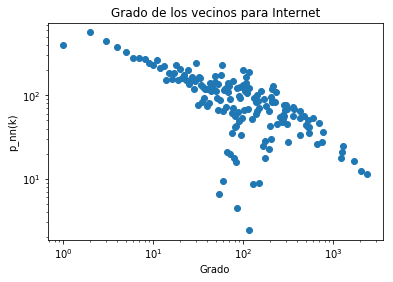

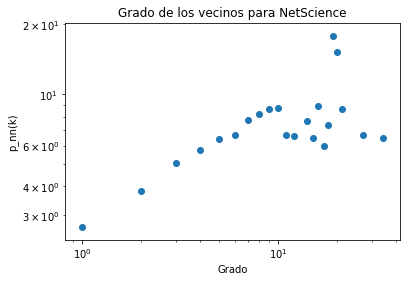

In [11]:
plt.scatter(F2[0],F2[1])
plt.ylabel("p_nn(k)")
plt.xlabel("Grado")
plt.title('Grado de los vecinos para Internet')
plt.xscale('log')
plt.yscale('log')
plt.show()
plt.title('Grado de los vecinos para NetScience')
plt.xscale('log')
plt.yscale('log')
plt.ylabel("p_nn(k)")
plt.xlabel("Grado")
plt.scatter(F1[0],F1[1])
plt.show()

Pareciera haber una tendencia lineal en ambos gráficos log-log. El primero (*Internet*) pareciera corresponder a una ley de potencias por ejemplo, si bien hay mucha dispersión en los valores centrales.

*iii.* Asumiendo que $𝑘_{𝑛𝑛}(𝑘)=𝑎𝑘^𝜇$, estime el exponente de correlación a partir de realizar una regresión de log$𝑘_{𝑛𝑛}$~log𝑘. Asegurese de graficar el fiteo en el grafico anterior.